In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib

Назви колонок: ['Country', '2020', '2021', '2022', '2023', '2024', '2025']
Розмір датасету: (196, 7)
Кількість пропусків у кожній колонці:
Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64
Після обробки пропусків:
Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64


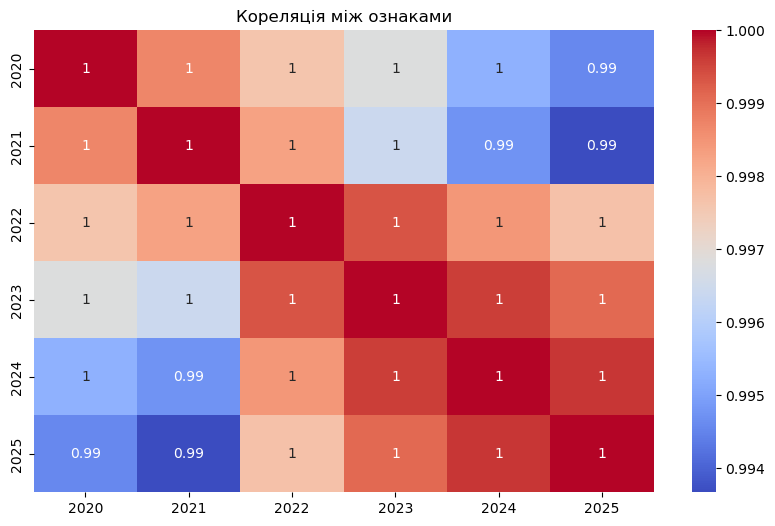

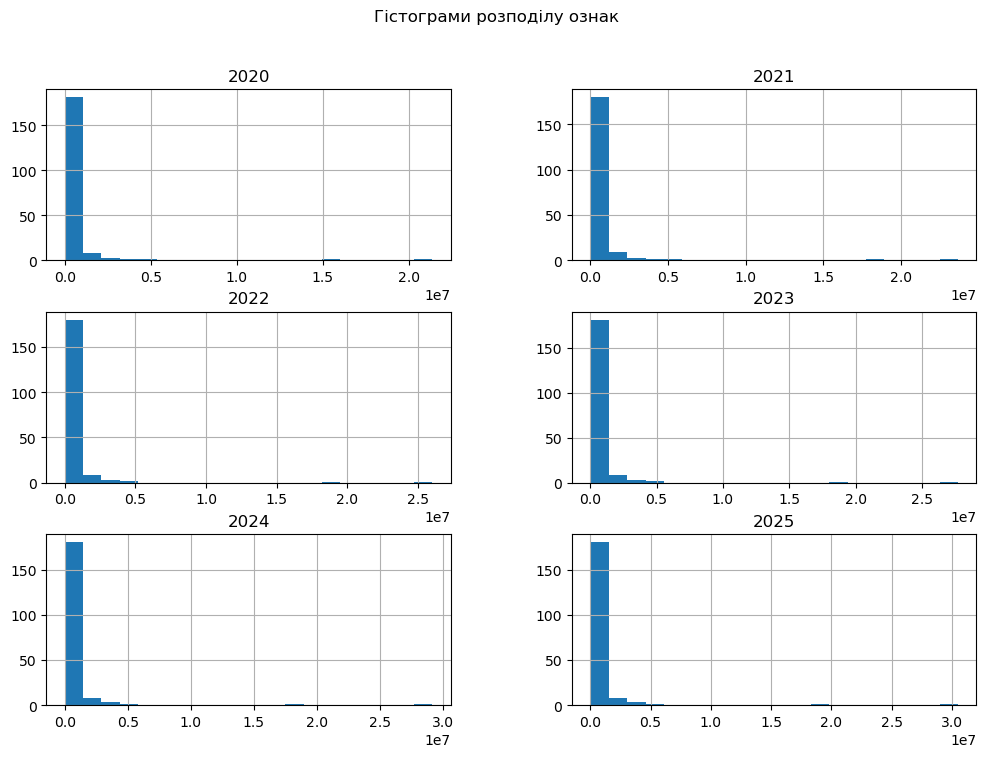

In [27]:
# Завантаження даних
file_path = r"C:\Users\Nuts1k\Downloads\gdp.csv"
df = pd.read_csv(file_path)

print("Назви колонок:", df.columns.tolist())
print("Розмір датасету:", df.shape)
print("Кількість пропусків у кожній колонці:")
print(df.isnull().sum())

# Заповнення пропусків середнім
df = df.fillna(df.mean(numeric_only=True))
print("Після обробки пропусків:")
print(df.isnull().sum())

# Візуалізації
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Кореляція між ознаками")
plt.show()

df.hist(figsize=(12,8), bins=20)
plt.suptitle("Гістограми розподілу ознак")
plt.show()

In [28]:
# Перетворення у long-формат
df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="GDP")

# Класи (3 категорії GDP)
df_long["Label"] = pd.qcut(df_long["GDP"], q=3, labels=["низький", "середній", "високий"])
print(df_long.head())

# Ознаки
X = df_long[["Year", "GDP"]].copy()
X["Year"] = X["Year"].astype(int)
y = df_long["Label"]

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Нормалізація
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

       Country  Year       GDP     Label
0  Afghanistan  2020   20136.0  середній
1      Albania  2020   15271.0   низький
2      Algeria  2020  164774.0   високий
3      Andorra  2020    2885.0   низький
4       Angola  2020   66521.0  середній


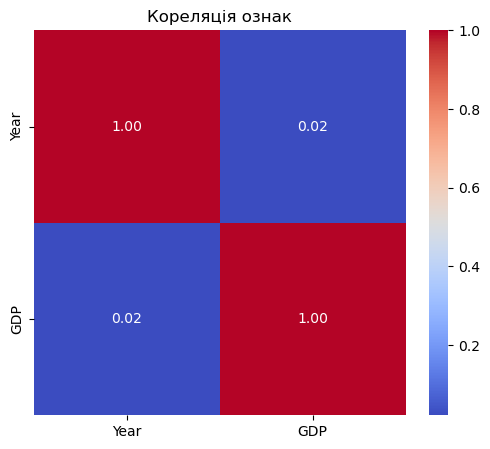

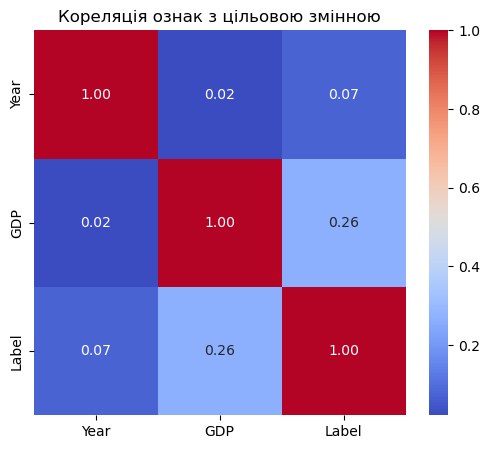

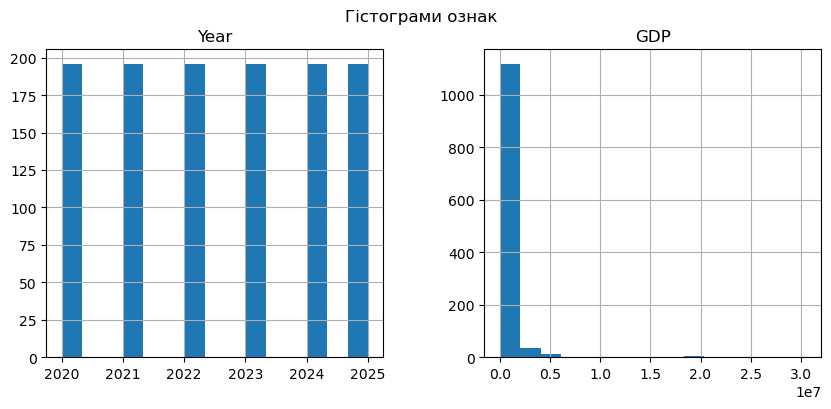

C:\Users\Nuts1k\AppData\Local\Temp\ipykernel_12024\1853365441.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Year", data=X_hist, palette="Set2")
C:\Users\Nuts1k\AppData\Local\Temp\ipykernel_12024\1853365441.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="GDP", data=X_hist, palette="Set2")


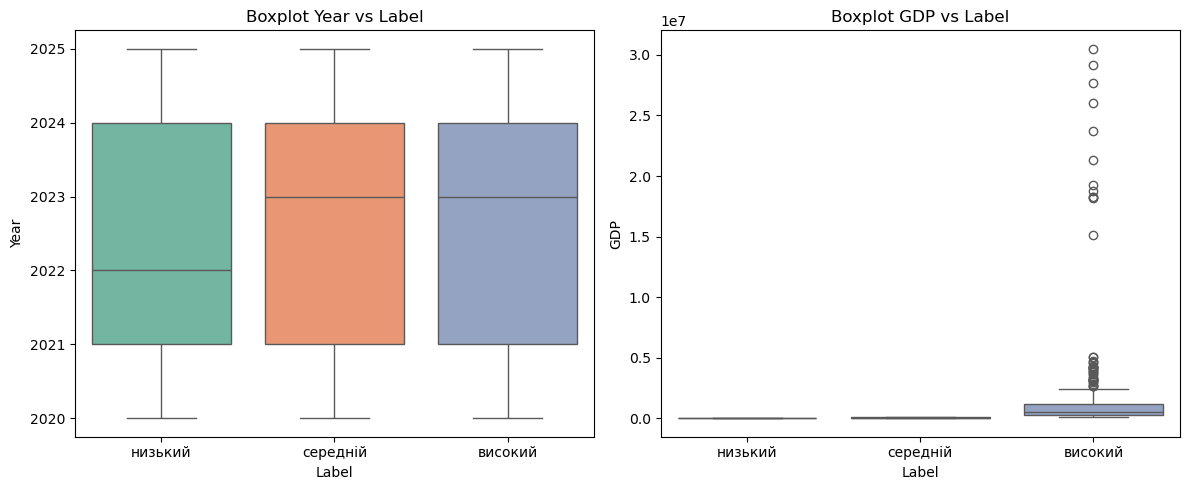

In [29]:
corr = X.corr()  # кореляції між ознаками
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляція ознак")
plt.show()

y_num = y.map({"низький": 0, "середній": 1, "високий": 2})
corr_target = X.copy()
corr_target["Label"] = y_num
plt.figure(figsize=(6, 5))
sns.heatmap(corr_target.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляція ознак з цільовою змінною")
plt.show()

X_hist = X.copy()
X_hist["Label"] = y
X_hist.hist(column=["Year", "GDP"], bins=15, figsize=(10,4), layout=(1,2))
plt.suptitle("Гістограми ознак")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Label", y="Year", data=X_hist, palette="Set2")
plt.title("Boxplot Year vs Label")

plt.subplot(1,2,2)
sns.boxplot(x="Label", y="GDP", data=X_hist, palette="Set2")
plt.title("Boxplot GDP vs Label")

plt.tight_layout()
plt.show()

Оптимальне k для kNN: 1, точність: 1.000
Звіт для kNN:
              precision    recall  f1-score   support

     високий       1.00      1.00      1.00        78
     низький       1.00      1.00      1.00        79
    середній       1.00      1.00      1.00        79

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



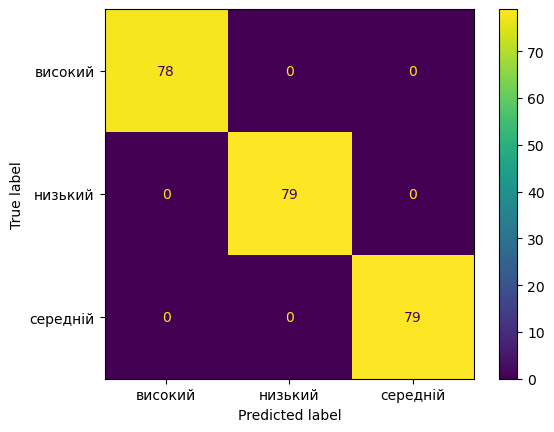

In [30]:
# kNN
best_score = 0
best_k = 1
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k
print(f"Оптимальне k для kNN: {best_k}, точність: {best_score:.3f}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Звіт для kNN:")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

Звіт для Decision Tree:
              precision    recall  f1-score   support

     високий       1.00      1.00      1.00        78
     низький       1.00      1.00      1.00        79
    середній       1.00      1.00      1.00        79

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



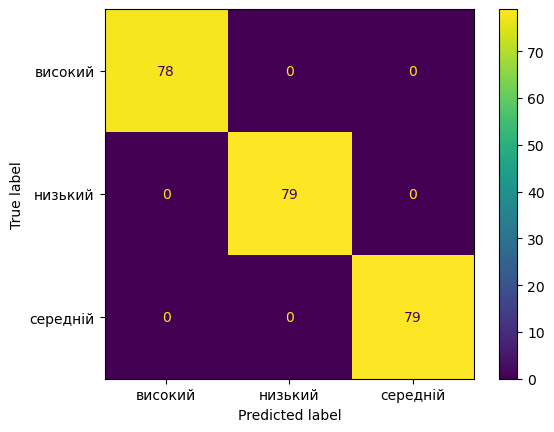

In [31]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Звіт для Decision Tree:")
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.show()
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

Найкращі параметри для SVM: {'C': 100, 'gamma': 1}
Звіт для SVM:
              precision    recall  f1-score   support

     високий       1.00      0.96      0.98        78
     низький       0.82      1.00      0.90        79
    середній       0.95      0.78      0.86        79

    accuracy                           0.92       236
   macro avg       0.93      0.92      0.91       236
weighted avg       0.93      0.92      0.91       236



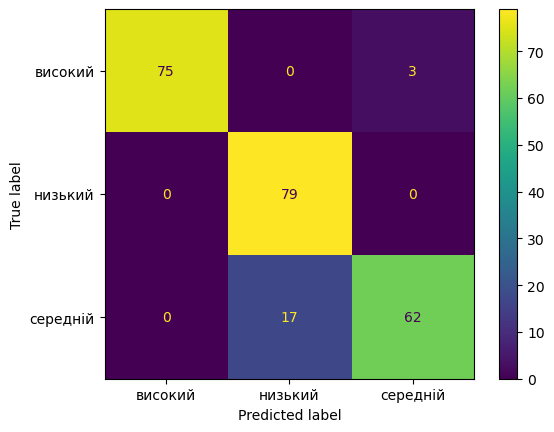

In [32]:
# SVM з GridSearch
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, refit=True, cv=5, scoring="f1_weighted")
grid.fit(X_train, y_train)
print("Найкращі параметри для SVM:", grid.best_params_)
y_pred_svm = grid.predict(X_test)
print("Звіт для SVM:")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

Звіт для Random Forest:
              precision    recall  f1-score   support

     високий       1.00      1.00      1.00        78
     низький       1.00      1.00      1.00        79
    середній       1.00      1.00      1.00        79

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



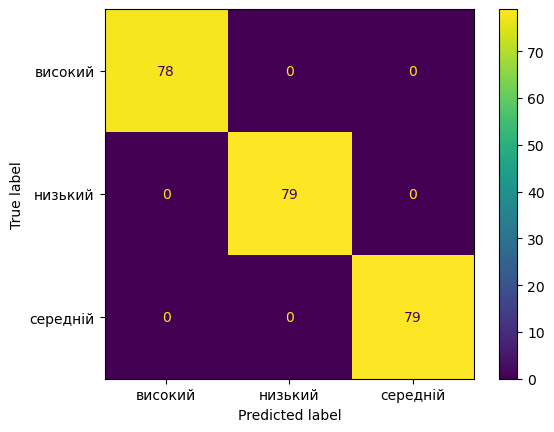

In [33]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Звіт для Random Forest:")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

Звіт для AdaBoost:
              precision    recall  f1-score   support

     високий       1.00      1.00      1.00        78
     низький       1.00      1.00      1.00        79
    середній       1.00      1.00      1.00        79

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



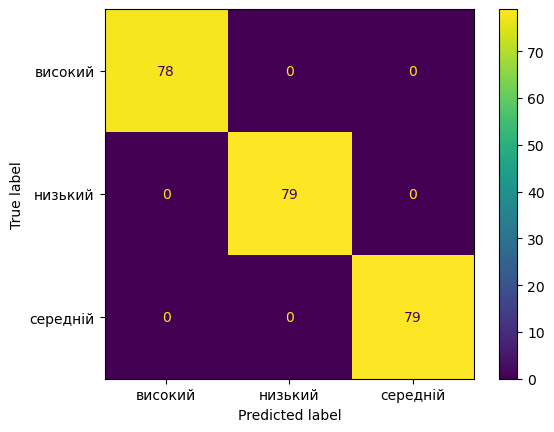

In [34]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("Звіт для AdaBoost:")
print(classification_report(y_test, y_pred_ada))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada)
plt.show()
f1_ada = f1_score(y_test, y_pred_ada, average="weighted")

In [35]:
# Перетворення міток (Label) у числовий формат
label_mapping = {"низький": 0, "середній": 1, "високий": 2}
y_train_int = y_train.map(label_mapping)
y_test_int = y_test.map(label_mapping)
num_classes = 3
y_train_one_hot = to_categorical(y_train_int, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_int, num_classes=num_classes)

In [36]:
# Побудова Архітектури FNN
model_fnn = Sequential(name="GDP_Classifier_FNN")
model_fnn.add(Input(shape=(X_train.shape[1],)))
model_fnn.add(Dense(32, activation='relu'))
model_fnn.add(Dropout(0.2)) 
model_fnn.add(Dense(16, activation='relu'))
model_fnn.add(Dropout(0.2))
model_fnn.add(Dense(num_classes, activation='softmax'))
model_fnn.summary()
model_fnn.summary()

Model: "GDP_Classifier_FNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675 (2.64 KB)

 Trainable params: 675 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

Model: "GDP_Classifier_FNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675 (2.64 KB)

 Trainable params: 675 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Компіляція, навчання моделі
model_fnn.compile(
    optimizer='adam',                 
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

history = model_fnn.fit(
    X_train, y_train_one_hot,
    epochs=50,             
    batch_size=32,
    validation_data=(X_test, y_test_one_hot),
    verbose=0
)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Звіт для FNN:
              precision    recall  f1-score   support

     високий       1.00      0.96      0.98        78
     низький       0.75      1.00      0.86        79
    середній       0.95      0.67      0.79        79

    accuracy                           0.88       236
   macro avg       0.90      0.88      0.87       236
weighted avg       0.90      0.88      0.87       236



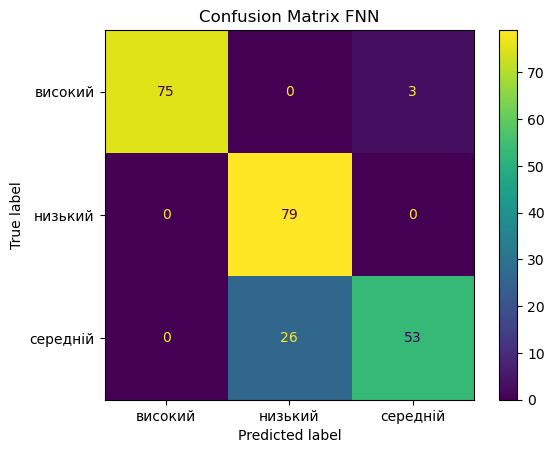

In [38]:
# Оцінка FNN
y_pred_probs = model_fnn.predict(X_test)
y_pred_fnn_int = np.argmax(y_pred_probs, axis=1)
reverse_label_mapping = {0: "низький", 1: "середній", 2: "високий"}
y_pred_fnn = pd.Series(y_pred_fnn_int).map(reverse_label_mapping)

print("Звіт для FNN:")
print(classification_report(y_test, y_pred_fnn))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_fnn)
plt.title("Confusion Matrix FNN")
plt.show()

f1_fnn = f1_score(y_test, y_pred_fnn, average="weighted")


F1 (weighted) для всіх моделей:
kNN: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
AdaBoost: 1.0000
SVM: 0.9145
FNN: 0.8743

Найкраща модель: kNN з F1 = 1.0000


Text(0.5, 1.0, 'Порівняння F1-score (weighted) для всіх моделей')

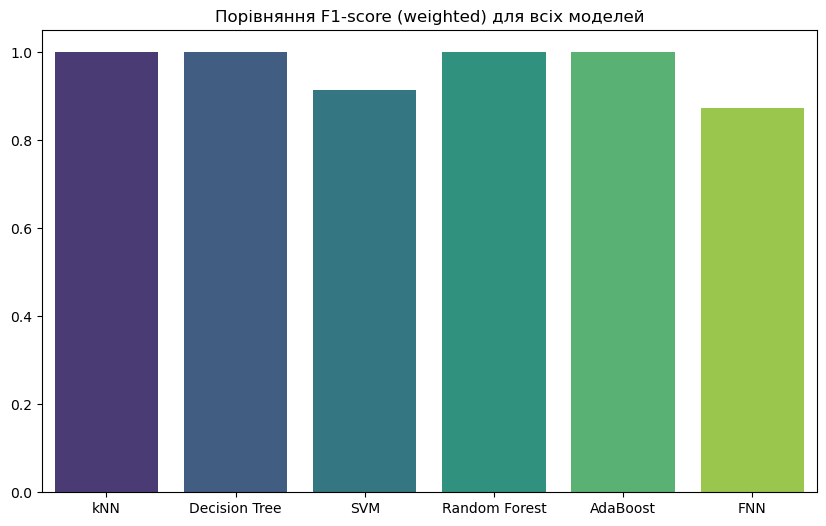

In [39]:
# Порівняння моделей
scores = {
    "kNN": f1_knn,
    "Decision Tree": f1_tree,
    "SVM": f1_svm,
    "Random Forest": f1_rf,
    "AdaBoost": f1_ada,
    "FNN": f1_fnn
}

print("\nF1 (weighted) для всіх моделей:")
scores_sorted = sorted(scores.items(), key=lambda item: item[1], reverse=True)
for name, score in scores_sorted:
    print(f"{name}: {score:.4f}")

best_model_name = scores_sorted[0][0]
print(f"\nНайкраща модель: {best_model_name} з F1 = {scores_sorted[0][1]:.4f}")


models = {
    "kNN": knn,
    "Decision Tree": tree,
    "SVM": grid.best_estimator_,
    "Random Forest": rf,
    "AdaBoost": ada,
    "FNN": model_fnn
}


# Візуалізація результатів
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(scores.keys()), 
    y=list(scores.values()), 
    palette="viridis",
    hue=list(scores.keys()), 
    legend=False             
)
plt.title("Порівняння F1-score (weighted) для всіх моделей")